# Analysis of Stack Overflow Data

## Table of Content:
* [Introduction](#first-bullet)
* [1. Business Understanding](#second-bullet)
* [2. Data Understanding](#third-bullet)
* [3. Data Preparation and Modeling for each question](#fourth-bullet)
* [3.1 Data Preparation and Analysis - Characteristics Software Developer](#a)
* [3.2 Data Preparation and Analysis - Hiring of a new Software Developer](#b)
* [3.3 Data Preparation and Analysis - Common ways to land a job](#c)
* [3.4 Data Preparation and Analysis - CV on job board](#d)
* [4. Results on Medium](#fifth-bullet)

## Introduction <a class="anchor" id="first-bullet"></a>

This project is an analysis of the Stack Overflow Survey from 2017. In the following sections we will look into the survey and answer 4 questions that can be useful for people who consider getting into software developing. The purpose of this project is it to apply the Cross-Industry Standard Process for Data Mining.

## 1. Business Understanding <a class="anchor" id="second-bullet"></a>

In this section we want to take a look at the questions that we want to find an answer to in the following sections.

The following questions are asked:
- How many people took part in the survey in 2017?
- How many of those people are professional software developers?
- What characteristics do software developers have? What is the average opinion of developers on certain statements, that are related to software developement?
- What are professionals (software developers)looking for when hiring a new software developer? What areas should one concentrate on when it comes to applying for jobs?
- How to find a job in software developement? What strategies and ways led to success for the survey participants? 
- What sites are most commonly used by software developers to put their profile/CV on for job hunt?

## 2. Data Understanding <a class="anchor" id="third-bullet"></a>

### Import of neccessary librarys 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
%matplotlib inline

### Data Gathering

Importing local datasets (csv) to pandas dataframe:

In [4]:
df = pd.read_csv('./project1_survey_results_public.csv')
schema = pd.read_csv('./project1_survey_results_schema.csv')

### Data Assessment

We read in two differnt csv-files:
- df stores the answers from the survey
- schema contains the questions that lead to the answers in df

For a first assessment df and schmema are printed out and screened visually to get familiar with the content:

In [5]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


As this is a survey we want to know how many people have participated in total.
As our questions from section 1.Business Understanding are mostly directed towards the answers from professional software developers we also want to see the number of professional developers that participated in this survey.

In [7]:
print("Total participants: ", len(df))
print("Total participants (only Professional developers): ", len(df[df['Professional']=='Professional developer']))

Total participants:  51392
Total participants (only Professional developers):  36131


### Assessment of which columns hold our desired answers:
For that we first take a look at the survey questions, which are stored in the schema data.
Therefore all questions in schema will be listed here:

In [8]:
list(schema.Question)

['Respondent ID number',
 'Which of the following best describes you?',
 'Do you program as a hobby or contribute to open source projects?',
 'In which country do you currently live?',
 'Are you currently enrolled in a formal, degree-granting college or university program?',
 'Which of the following best describes your current employment status?',
 "Which of the following best describes the highest level of formal education that you've completed?",
 "Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?",
 'How often do you work from home or remotely?',
 'In terms of the number of employees, how large is the company or organization you work for?',
 'Which of the following best describes the type of company or organization you work for?',
 'How long has it been since you first learned how to program?',
 'For how many years have you coded as part of your job?',
 'For how many years did you code as part of you

After screening the schema data and looking at the questions asked in 1.Business Understanding we will determine the columns in the answer-df that are necessary for our answers:

How many people took part in the survey in 2017?
- Length of df will be used to answer this question

How many of those people are professional software developers?
- Length of df that is filtered to only professional developers in the "Professional" column

What characteristics do software developers have? What is the average opinion of developers on certain statements, that are related to software developement?
- To answer this question we will analyze the following columns in df: 'Professional','ProblemSolving', 'BuildingThings','LearningNewTech','BoringDetails','JobSecurity','DiversityImportant','AnnoyingUI','FriendsDevelopers','RightWrongWay','UnderstandComputers','SeriousWork','InvestTimeTools','WorkPayCare','KinshipDevelopers','ChallengeMyself','CompetePeers','ChangeWorld'

What are professionals (software developers)looking for when hiring a new software developer? What areas should one concentrate on when it comes to applying for jobs?
- To answer this question we will analyze the following columns in df: 'Professional', 'DeveloperType', 'ImportantHiringAlgorithms', 'ImportantHiringTechExp', 'ImportantHiringCommunication', 'ImportantHiringOpenSource', 'ImportantHiringPMExp', 'ImportantHiringCompanies', 'ImportantHiringTitles', 'ImportantHiringEducation', 'ImportantHiringRep', 'ImportantHiringGettingThingsDone'

How to find a job in software developement? What strategies and ways led to success for the survey participants?
- To answer this question we will analyze the following columns in df: 'Professional','LearnedHiring'

What sites are most commonly used by software developers to put their profile/CV on for job hunt?
- To answer this question we will analyze the following columns in df: 'Professional','JobProfile'

## 3. Data Preparation and Modeling for each question <a class="anchor" id="fourth-bullet"></a>

In this section we will prepare the data for each question separately.

### 3.1 Data Preparation and Analysis - Characteristics Software Developer <a class="anchor" id="a"></a>

In this section we will prepare the data for the following question:
- What characteristics do software developers have? What is the average opinion of developers on certain statements, that are related to software developement?

First we take a look at the question that the participants were asked - the answers on this questions we want to use to find answers for our questions above:

The individuals where asked the following question: "To what extent do you agree or disagree with each of the following
statements?"

- I love solving problems
- Building things is very rewarding
- Learning new technologies is fun
- I tend to get bored by implementation details
- Job security is important to me
- Diversity in the workplace is important
- It annoys me when software has a poor UI
- Most of my friends are developers, engineers, or scientists
- There’s a right and a wrong way to do everything
- Honestly, there’s a lot about computers that I just don’t understand
- I take my work very seriously
- I invest a lot of time into the tools I use
- I don’t really care what I work on, so long as I’m paid well
- I feel a sense of kinship to other developers
- I like to challenge myself
- I think of myself as competing with my peers
- I want to change the world

The individuals should then rate how much they agree with those statements in the following scale:
1 = “Strongly disagree”
2 = “Disagree”
3 = “Somewhat agree”
4 = “Agree”
5 = “Strongly agree”

We will look at the answers and see what characteristics professional software developers agree/disagree with to have a reference point on what kind of person could be suitable for a career in software developement.

First we take only the columns from the answer-df that we need to answer our questions and store it in df_1:

In [9]:
df_q1=df[['Professional','ProblemSolving', 'BuildingThings','LearningNewTech','BoringDetails','JobSecurity','DiversityImportant','AnnoyingUI','FriendsDevelopers','RightWrongWay','UnderstandComputers','SeriousWork','InvestTimeTools','WorkPayCare','KinshipDevelopers','ChallengeMyself','CompetePeers','ChangeWorld']]
df_q1.head()

,Professional,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld
0,Student,Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree
1,Student,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Professional developer,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Strongly agree,Agree,Somewhat agree,Disagree,Disagree,Agree,Somewhat agree,Disagree,Somewhat agree,Agree,Disagree,Agree
3,Professional non-developer who sometimes write...,Strongly agree,Strongly agree,Strongly agree,Disagree,Somewhat agree,Agree,Agree,Agree,Somewhat agree,Strongly disagree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Somewhat agree,Agree
4,Professional developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Issue: 
The answers are given in string format but we want to know what developers think on average. Since we can't get an average of str-values we first need to replace them with their correspontent int values:

In [10]:
#Replace Strings with corespondent values: 
#1 = “Strongly disagree”
#2 = “Disagree”
#3 = “Somewhat agree”
#4 = “Agree”
#5 = “Strongly agree
df_q1num=df_q1.replace(['Strongly disagree','Disagree','Somewhat agree','Agree','Strongly agree'],[1, 2, 3, 4, 5])
df_q1num.head()

,Professional,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld
0,Student,5.0,5.0,4.0,2.0,5.0,4.0,4.0,2.0,3.0,2.0,5.0,5.0,1.0,4.0,4.0,2.0,4.0
1,Student,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Professional developer,5.0,5.0,5.0,3.0,4.0,5.0,4.0,3.0,2.0,2.0,4.0,3.0,2.0,3.0,4.0,2.0,4.0
3,Professional non-developer who sometimes write...,5.0,5.0,5.0,2.0,3.0,4.0,4.0,4.0,3.0,1.0,5.0,4.0,2.0,5.0,5.0,3.0,4.0
4,Professional developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the first visual assessment we can already see that we have multiple rows with NaN values. The following line also shows that we have 22500 rows with NaN values in total, which is around 44% of the total rows.
As we can't get any valuable information for our question out of rows with NaN values we will have to drop them.

In [13]:
df_q1num.isnull().any(axis=1).sum()

22500

In [14]:
df_q1num.isnull().any(axis=1).sum()/len(df_q1num)

0.43781133250311333

In [15]:
#Some people have not answered that questions and we only want to take valid answers into account
#Therefore we drop rows with NaN values:
df_q1_clean=df_q1num.dropna()
df_q1_clean.head()

,Professional,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld
0,Student,5.0,5.0,4.0,2.0,5.0,4.0,4.0,2.0,3.0,2.0,5.0,5.0,1.0,4.0,4.0,2.0,4.0
2,Professional developer,5.0,5.0,5.0,3.0,4.0,5.0,4.0,3.0,2.0,2.0,4.0,3.0,2.0,3.0,4.0,2.0,4.0
3,Professional non-developer who sometimes write...,5.0,5.0,5.0,2.0,3.0,4.0,4.0,4.0,3.0,1.0,5.0,4.0,2.0,5.0,5.0,3.0,4.0
8,Professional developer,5.0,5.0,5.0,1.0,4.0,5.0,5.0,3.0,3.0,1.0,5.0,2.0,1.0,4.0,5.0,5.0,4.0
14,Professional developer,5.0,5.0,4.0,2.0,3.0,3.0,5.0,3.0,3.0,2.0,4.0,4.0,2.0,3.0,4.0,3.0,3.0


Now we want to know the average of all the answers on each field:

In [16]:
#Create a series with the mean of all coluumns
q1_series=df_q1_clean.mean().sort_values(ascending=True)

In [17]:
q1_series

WorkPayCare            2.172470
BoringDetails          2.698602
CompetePeers           2.819050
FriendsDevelopers      2.897688
UnderstandComputers    3.014952
RightWrongWay          3.081130
KinshipDevelopers      3.541672
ChangeWorld            3.556105
InvestTimeTools        3.607296
DiversityImportant     3.758272
JobSecurity            3.771944
SeriousWork            4.106396
AnnoyingUI             4.117576
ChallengeMyself        4.217292
LearningNewTech        4.361415
BuildingThings         4.482383
ProblemSolving         4.507338
dtype: float64

We want our answers to be understood easily visually. Therefore we want them to be visualized in a plot.
A horizontal bar plot is chosen and created as following:

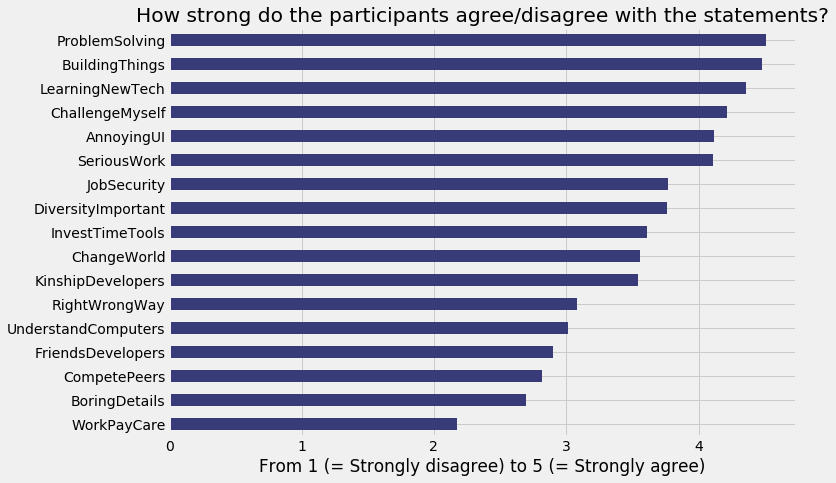

In [18]:
plt.style.use('fivethirtyeight') 
q1_series.plot.barh(figsize=(10,7),cmap='tab20b')
plt.xlabel("From 1 (= Strongly disagree) to 5 (= Strongly agree)");
plt.title("How strong do the participants agree/disagree with the statements?");

#### Inclusion of only professional software developers:

The plot above includes all participants in the survey, but we are especially interested in the Software developers our question is especially about their characteristics.

Therefore we will only look at the answers from people that stated that they are Professional developers already:

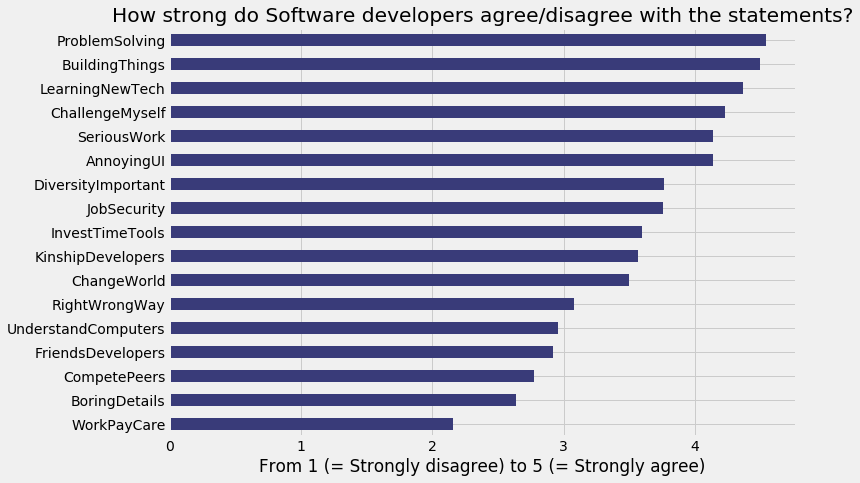

In [19]:
q1_series_SW=df_q1_clean[df_q1_clean['Professional']=='Professional developer'].mean().sort_values(ascending=True)
plt.style.use('fivethirtyeight') 
q1_series_SW.plot.barh(figsize=(10,7),cmap='tab20b')
plt.xlabel("From 1 (= Strongly disagree) to 5 (= Strongly agree)");
plt.title("How strong do Software developers agree/disagree with the statements?");
plt.savefig('characteristics_SWDev.png')

Conculsion:
We see that the top 3 points that Software developers agree/agree strongly with are:
- A. I love solving problems
- B. Building things is very rewarding
- C. Learning new technologies is fun

That means one could be a good fit for a career as a Software developer if you find yourself to have similar opinions and for example like solving problems, enjoy building new things and have fun learning new technologies.

### 3.2 Data Preparation and Analysis - Hiring of a new Software Developer <a class="anchor" id="b"></a>

In this section we will prepare and analyze the data for the following question:
- What are professionals (software developers)looking for when hiring a new software developer? What areas should one concentrate on when it comes to applying for jobs?

First we take a look at the question that the participants were asked - the answers on this questions we want to use to find answers for our questions above:

Congratulations! You’ve just been put in charge of technical recruiting at
Globex, a multinational high-tech firm. This job comes with a corner office, and
you have an experienced staff of recruiters at your disposal. All they need to be
successful is a sense of the relative importance they should place on each of the
following when recruiting software developers. What do you tell them?

- A. Knowledge of algorithms and data structures
- B. Experience with specific tools (libraries, frameworks, etc.) used by the employer
- C. Communication skills
- D. Contributions to open source projects
- E. Experience with specific project management tools & techniques
- F. Previous companies worked at
- G. Previous job titles held
- H. Educational credentials (e.g. schools attended, specific field of study, grades earned)
- I. Stack Overflow reputation
- J. Getting things done

Possible answers were:
- 1 = ‘Not at all important’,
- 2 = ‘Not very important’,
- 3 = ‘Somewhat important’,
- 4 = ‘Important’,
- 5 = ‘Very important’

First we take only the columns from the answer-df that we need to answer our questions and store it in df_q2:

In [20]:
#Create a df that only includes the neccessary columns for Question 2
df_q2=df[['Professional','DeveloperType','ImportantHiringAlgorithms','ImportantHiringTechExp','ImportantHiringCommunication','ImportantHiringOpenSource','ImportantHiringPMExp','ImportantHiringCompanies','ImportantHiringTitles','ImportantHiringEducation','ImportantHiringRep','ImportantHiringGettingThingsDone']]
df_q2.head()

,Professional,DeveloperType,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone
0,Student,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important
1,Student,NaN,Important,Important,Important,Important,Somewhat important,Somewhat important,Not very important,Somewhat important,Not very important,Very important
2,Professional developer,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Professional non-developer who sometimes write...,NaN,Somewhat important,Somewhat important,Very important,Very important,Somewhat important,Somewhat important,Not very important,Not very important,Important,Very important
4,Professional developer,Mobile developer; Graphics programming; Deskto...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#As we want only the answers from already professional developers, we only take those columns
df_q2_SW=df_q2[df_q2['Professional']=='Professional developer']
df_q2_SW.head()

,Professional,DeveloperType,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone
2,Professional developer,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Professional developer,Mobile developer; Graphics programming; Deskto...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Professional developer,Web developer,Somewhat important,Somewhat important,Important,Somewhat important,Not very important,Somewhat important,Not very important,Somewhat important,Not very important,Important
8,Professional developer,Web developer; Mobile developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Professional developer,Mobile developer; Desktop applications developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Again we want to drop any rows with NaN values as they will not add any value to answering our question:
df_q2_SW_clean=df_q2_SW.dropna()
df_q2_SW_clean.head()

,Professional,DeveloperType,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone
7,Professional developer,Web developer,Somewhat important,Somewhat important,Important,Somewhat important,Not very important,Somewhat important,Not very important,Somewhat important,Not very important,Important
13,Professional developer,Web developer,Somewhat important,Somewhat important,Important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Not very important,Somewhat important,Important
14,Professional developer,Embedded applications/devices developer,Important,Important,Important,Somewhat important,Not very important,Somewhat important,Somewhat important,Important,Important,Important
15,Professional developer,Desktop applications developer,Somewhat important,Somewhat important,Somewhat important,Important,Not very important,Not very important,Not very important,Not very important,Not very important,Very important
19,Professional developer,Data scientist; Other,Important,Somewhat important,Important,Somewhat important,Not very important,Not very important,Not very important,Not very important,Not very important,Very important


#### Issue: 
The answers are given in string format but we want to know what developers think on average. Since we can't get an average of str-values we first need to replace them with their correspontent int values:

In [23]:
#Replace Strings with corespondent values: 
#1 = ‘Not at all important’,
#2 = ‘Not very important’,
#3 = ‘Somewhat important’,
#4 = ‘Important’,
#5 = ‘Very important’
df_q2num=df_q2_SW_clean.replace(['Not at all important','Not very important','Somewhat important','Important','Very important'],[1, 2, 3, 4, 5])
df_q2num.head()

,Professional,DeveloperType,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone
7,Professional developer,Web developer,3,3,4,3,2,3,2,3,2,4
13,Professional developer,Web developer,3,3,4,3,3,3,3,2,3,4
14,Professional developer,Embedded applications/devices developer,4,4,4,3,2,3,3,4,4,4
15,Professional developer,Desktop applications developer,3,3,3,4,2,2,2,2,2,5
19,Professional developer,Data scientist; Other,4,3,4,3,2,2,2,2,2,5


Now we want the average on these fields in the hiring process and display them easily understandable in visual form. Therefore a horizontal bar plot was choosen:

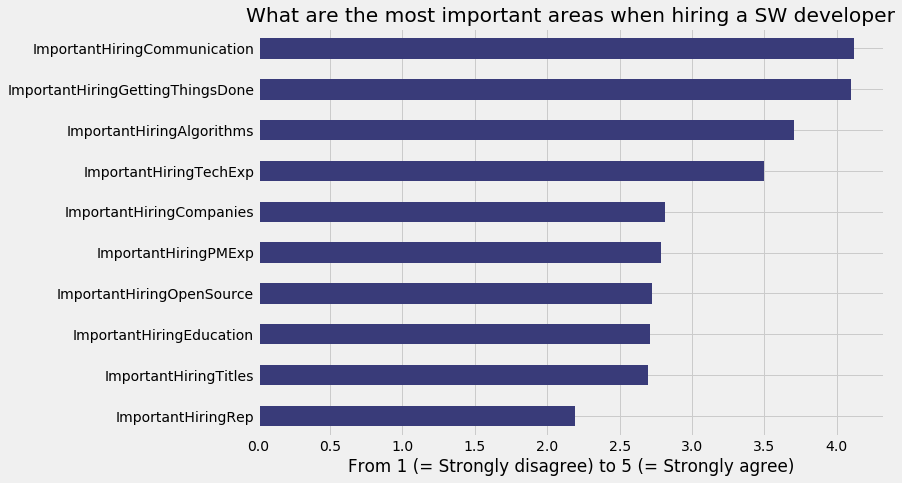

In [24]:
q2_series=df_q2num.mean().sort_values(ascending=True)

q2_series.plot.barh(figsize=(10,7),cmap='tab20b')
plt.xlabel("From 1 (= Strongly disagree) to 5 (= Strongly agree)");
plt.title("What are the most important areas when hiring a SW developer");
plt.savefig('hiringareas_SWDev.png')

Conclusion: These answers give us a reference point on what to concentrate on when wanting to be hired as a software developers (from a software developer view).
It shows for example that on average it is more important to have good communication skills than having a good Stack Overflow reputation.

### 3.3 Data Preparation and Analysis - Common ways to land a job <a class="anchor" id="c"></a>

In this section we will prepare and analyze the data for the following question:
- How to find a job in software developement? What strategies and ways led to success for the survey participants?

The participiant where asked how they landed their current position. We will look at the answers in the following sections:

In [25]:
#Create a dataframe with only the columns needed to find out
df_q3=df[['Professional','LearnedHiring']]
df_q3.head()

,Professional,LearnedHiring
0,Student,NaN
1,Student,Some other way
2,Professional developer,NaN
3,Professional non-developer who sometimes write...,"A friend, family member, or former colleague t..."
4,Professional developer,NaN


In [26]:
#Only consider Professional developers and drop NaN values (same reason as in 3.1 and 3.2)
df_q3_SW=df_q3[df_q3['Professional']=='Professional developer'].dropna()
df_q3_SW.head()

,Professional,LearnedHiring
7,Professional developer,A tech-specific job board
13,Professional developer,"A friend, family member, or former colleague t..."
14,Professional developer,An external recruiter or headhunter
19,Professional developer,I was contacted directly by someone at the com...
21,Professional developer,An external recruiter or headhunter


We want to create a visualization to see how Software developers got their jobs in order to find out what common ways are and what to concentrate on when searching yourself.
Therefore we created a horizontal barplot that shows the amount of answers on each answer-option in percent:

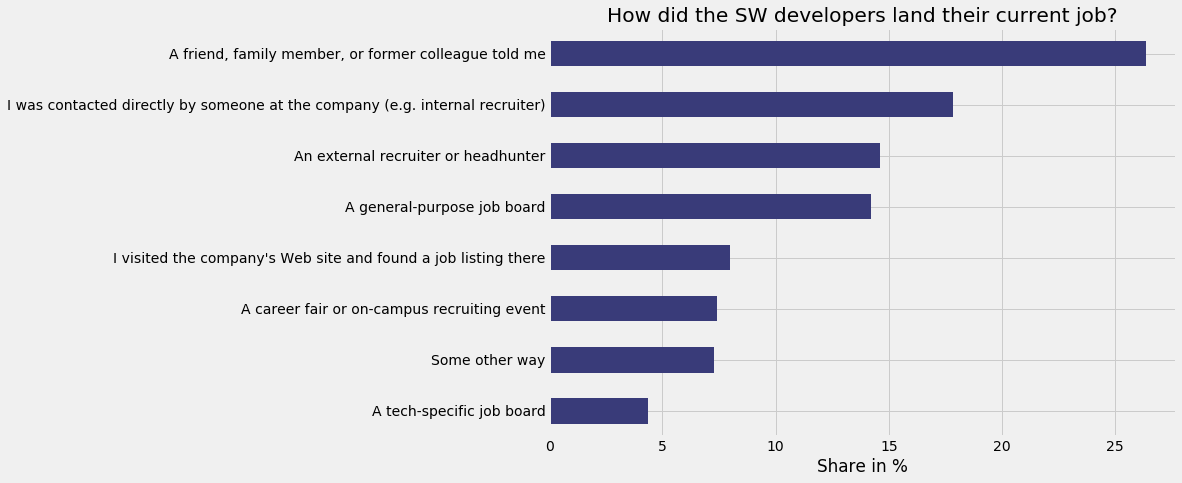

In [27]:
((df_q3_SW.LearnedHiring.value_counts().sort_values()/len(df_q3_SW))*100).plot.barh(figsize=(10,7),cmap='tab20b')
plt.xlabel("Share in %");
plt.title("How did the SW developers land their current job?");
plt.savefig('hiringways_SWDev.png')

Conclusion: So we can see that networking is key! Around 25% of the Software developers have found their current position through a contact. We can also see that job boards can be quite useful to find a job or be contacted by recruiters.
As there are so many different sites to choose from now we want to find out which sited you should upload your CV to:

### 3.4 Data Preparation and Analysis - CV on job board <a class="anchor" id="d"></a>

In this section we will prepare and analyze the data for the following question:
- What sites are most commonly used by software developers to put their profile/CV on for job hunt?

The participiant where asked on which Job sites they maintain a profile or/and have their CV uploaded. We will look at the answers and try to find an answer to our own question:

In [28]:
#Create dataframe with only the columns that are needed for the answer:
df_q4=df[['Professional','JobProfile']]
df_q4.head()

,Professional,JobProfile
0,Student,Other
1,Student,Other
2,Professional developer,NaN
3,Professional non-developer who sometimes write...,LinkedIn; Other
4,Professional developer,NaN


In [29]:
#Only consider Professional developers and drop NaN values (same reason as in sections before)
df_q4_SW=df_q4[df_q4['Professional']=='Professional developer'].dropna()
df_q4_SW.head()

,Professional,JobProfile
7,Professional developer,LinkedIn
13,Professional developer,LinkedIn; Xing
14,Professional developer,LinkedIn
21,Professional developer,LinkedIn; Other
23,Professional developer,LinkedIn


#### Issue: 
This question allows multiple possible answers. A first visual analysis shows that participants have answered multiple job boards - for example: "LinkedIn; Xing". Therefore we first need to separate the strings to then find the numbers of how many participants maintan a profile/have a CV on each sites.

Below we first have a look at the different answers. We see that there are many combined answeres, therefore we can not use the dataframe like this:

In [30]:
#Lets have a look at the different answers
df_q4_SW.JobProfile.value_counts()

LinkedIn                                                                                                            10790
LinkedIn; Other                                                                                                      1308
Other                                                                                                                 764
LinkedIn; Xing                                                                                                        498
Xing                                                                                                                  434
Indeed; LinkedIn                                                                                                      431
LinkedIn; Monster                                                                                                     427
LinkedIn; Naukri                                                                                                      413
Glassdoor; LinkedIn     

Therefore we will split the string values in JobProfile by "; " and then count the different separated strings with the Counter function:

In [31]:
CV_Sites=Counter(df_q4_SW.JobProfile.str.split("; ").sum())

In [32]:
#Lets have a look at the outcome:
CV_Sites

Counter({'LinkedIn': 16768,
         'Xing': 1157,
         'Other': 2640,
         'Indeed': 1697,
         'Monster': 1960,
         'Naukri': 1163,
         'JobSite.co.uk': 235,
         'Dice': 739,
         'Glassdoor': 881,
         'Hired.com': 614,
         'Remix_jobs': 54,
         'TripleByte': 27,
         'StepStone': 83,
         'CW_Jobs': 253,
         'Workopolis': 64,
         'Reed.co.uk': 231,
         'Total_Jobs': 127,
         'Pracuj': 131,
         'Talent.io': 85})

We want to plot this in a horizontal box plot that shows us what percentage of professional developers maintain a profile/have a CV on the different job boards.
Therefore we first need to transform the Counter obect into a dataframe and calculate the percentage in a separate column.
After that the dataframe is plotted.

In [33]:
#In order to plot this we need to transform this Counter data into a dataframe:
df_CV=pd.DataFrame.from_dict(CV_Sites, orient='index').reset_index()
df_CV

,index,0
0,LinkedIn,16768
1,Xing,1157
2,Other,2640
3,Indeed,1697
4,Monster,1960
5,Naukri,1163
6,JobSite.co.uk,235
7,Dice,739
8,Glassdoor,881
9,Hired.com,614


In [34]:
#renaming the columns:
df_CV_clean=df_CV.rename(columns={0: "Count","index":"JobSites"})

In [35]:
#Adding a column with the Count Values in percent
df_CV_clean["Percentages"]=(df_CV_clean.Count/sum(df_CV_clean.Count))*100

In [36]:
df_CV_clean

,JobSites,Count,Percentages
0,LinkedIn,16768,58.002698
1,Xing,1157,4.002214
2,Other,2640,9.132104
3,Indeed,1697,5.870144
4,Monster,1960,6.779896
5,Naukri,1163,4.022969
6,JobSite.co.uk,235,0.812896
7,Dice,739,2.556297
8,Glassdoor,881,3.047494
9,Hired.com,614,2.123906


The result is then plotted in a horizontal box plot:

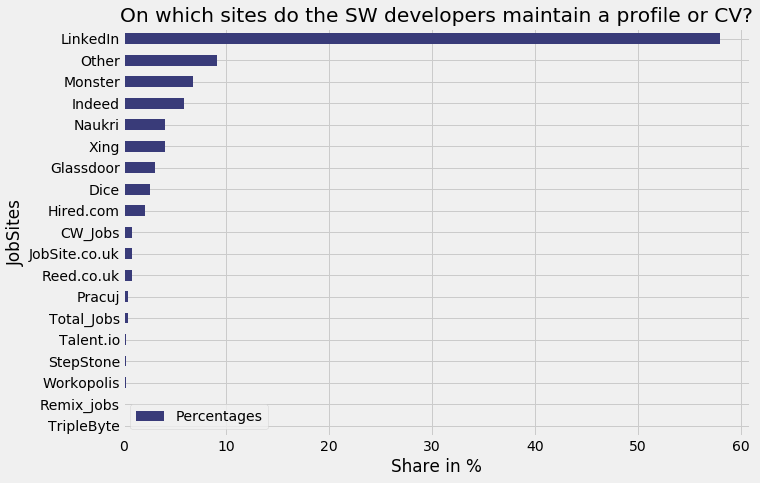

In [37]:
df_CV_clean.sort_values(by=['Percentages']).plot.barh(y='Percentages',x='JobSites',figsize=(10,7),cmap='tab20b')
plt.xlabel("Share in %");
plt.title("On which sites do the SW developers maintain a profile or CV?");
plt.savefig('hiringCV_SWDev.png')

Conclusion: This shows us that Linkedin is by far the most popular site and it would be the most usefull to have a profile/CV there.

## 4. Results on Medium <a class="anchor" id="fifth-bullet"></a>
The results of this analysis are published in the following Medium post: